In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")



In [79]:
ola=pd.read_csv('ola_driver_scaler.csv')
ola.head(4)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [80]:
#Exploratory Data Analysis

In [81]:
ola.shape

(19104, 14)

In [82]:
print("Number of rows: ",ola.shape[0])
print("Number of columns: ",ola.shape[1])

Number of rows:  19104
Number of columns:  14


In [83]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [84]:
ola.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [85]:
ola.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [86]:
ola['MMM-YY']=pd.to_datetime(ola['MMM-YY'])
ola['Dateofjoining']=pd.to_datetime(ola['Dateofjoining'])
ola['LastWorkingDate']=pd.to_datetime(ola['LastWorkingDate'])

In [87]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [88]:
ola.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [89]:
#Checking for NAN values
ola.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

Features 'Age','Gender', 'LastWokingDate' has missing values
'LastWokingDate' has missing values which implies the driver has not keft the company yet

In [90]:
num_vars=ola.select_dtypes(np.number)
num_vars

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,1,28.0,0.0,2,57387,1,1,-665480,2
2,2,1,28.0,0.0,2,57387,1,1,0,2
3,3,2,31.0,0.0,2,67016,2,2,0,1
4,4,2,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...
19099,19099,2788,30.0,0.0,2,70254,2,2,740280,3
19100,19100,2788,30.0,0.0,2,70254,2,2,448370,3
19101,19101,2788,30.0,0.0,2,70254,2,2,0,2
19102,19102,2788,30.0,0.0,2,70254,2,2,200420,2


DATA PROCESSING AND FEATURE ENGINEERING

In [91]:
ola1=ola.copy(deep=True)
ola1.head(2)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2


#Target variable creation.
#Creating a variable target, which creates a target column which tell if the driver has left the company or not
#Driver where last working day is present, will be 1

In [93]:
first=(ola1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
first.rename(columns={'LastWorkingDate':'target'},inplace=True)
first.head()

,Driver_ID,target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [94]:
# Create a column which tells whether the quarterly rating has increased for that driver - 
# for those whose quarterly rating has increased we assign the value 1
QR1=(ola1.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating'].reset_index())

QR2=(ola1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'].reset_index())

In [95]:
QR1

,Driver_ID,Quarterly Rating
0,1,2
1,2,1
2,4,1
3,5,1
4,6,1
...,...,...
2376,2784,3
2377,2785,1
2378,2786,2
2379,2787,2


In [96]:
QR2

,Driver_ID,Quarterly Rating
0,1,2
1,2,1
2,4,1
3,5,1
4,6,2
...,...,...
2376,2784,4
2377,2785,1
2378,2786,1
2379,2787,1


In [97]:
QR1.shape, QR2.shape

((2381, 2), (2381, 2))

In [98]:
QR1.isna().sum(), QR2.isna().sum()

(Driver_ID           0
 Quarterly Rating    0
 dtype: int64,
 Driver_ID           0
 Quarterly Rating    0
 dtype: int64)

In [99]:
first=first.merge(QR1,on='Driver_ID')
first=first.merge(QR2,on='Driver_ID')

In [100]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y
0,1,0,2,2
1,2,1,1,1
2,4,0,1,1
3,5,0,1,1
4,6,1,1,2


In [101]:
first['Promotion']=np.where(first['Quarterly Rating_x']==first['Quarterly Rating_y'],0,1)
first

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion
0,1,0,2,2,0
1,2,1,1,1,0
2,4,0,1,1,0
3,5,0,1,1,0
4,6,1,1,2,1
...,...,...,...,...,...
2376,2784,1,3,4,1
2377,2785,0,1,1,0
2378,2786,0,2,1,1
2379,2787,0,2,1,1


In [102]:
# Create a column which tells whether the monthly income has increased for that driver - 
# for those whose monthly income has increased we assign the value 1

incm1 =  (ola1.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
incm2 = (ola1.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()


In [103]:
incm1

,Driver_ID,Income
0,1,57387
1,2,67016
2,4,65603
3,5,46368
4,6,78728
...,...,...
2376,2784,82815
2377,2785,12105
2378,2786,35370
2379,2787,69498


In [104]:
incm2

,Driver_ID,Income
0,1,57387
1,2,67016
2,4,65603
3,5,46368
4,6,78728
...,...,...
2376,2784,82815
2377,2785,12105
2378,2786,35370
2379,2787,69498


In [105]:
incm1.shape, incm2.shape

((2381, 2), (2381, 2))

In [106]:
incm1.isna().sum(), incm2.isna().sum()

(Driver_ID    0
 Income       0
 dtype: int64,
 Driver_ID    0
 Income       0
 dtype: int64)

In [107]:
first=first.merge(incm1,on='Driver_ID')
first=first.merge(incm2,on='Driver_ID')

In [108]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y
0,1,0,2,2,0,57387,57387
1,2,1,1,1,0,67016,67016
2,4,0,1,1,0,65603,65603
3,5,0,1,1,0,46368,46368
4,6,1,1,2,1,78728,78728


In [109]:
first['Raise']=np.where(first['Income_x']==first['Income_y'],0,1)
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0
3,5,0,1,1,0,46368,46368,0
4,6,1,1,2,1,78728,78728,0


In [110]:
first.tail()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
2376,2784,1,3,4,1,82815,82815,0
2377,2785,0,1,1,0,12105,12105,0
2378,2786,0,2,1,1,35370,35370,0
2379,2787,0,2,1,1,69498,69498,0
2380,2788,1,1,2,1,70254,70254,0


In [111]:
first=first[['Driver_ID','target','Raise','Promotion']]
first.head()

,Driver_ID,target,Raise,Promotion
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,0,1


In [112]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'first'}
ola1 = ola1.groupby([ola1['Driver_ID']]).aggregate(functions)
ola1['month'] = pd.to_datetime(ola['Dateofjoining']).dt.month
ola1['year'] = pd.DatetimeIndex(ola1['Dateofjoining']).year
ola1.rename(columns={'MMM-YY':'Reportings'},inplace=True)

In [113]:
ola1.reset_index(drop=True,inplace=True)
ola1=ola1.merge(first,on='Driver_ID')
ola1.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion
0,3,1,28.0,0.0,C23,2,2018-12-24,2019-03-11,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,2020-11-06,NaT,2,0,134032,2,1,12,2020,1,0,0
2,5,4,43.0,0.0,C13,2,2019-12-07,2020-04-27,2,350000,328015,2,1,11,2019,0,0,0
3,3,5,29.0,0.0,C9,0,2019-01-09,2019-03-07,1,120360,139104,1,1,12,2019,0,0,0
4,5,6,31.0,1.0,C11,1,2020-07-31,NaT,3,1265000,393640,3,1,12,2020,1,0,1


In [114]:
import regex
ola1['Age']=ola1['Age'].astype('int64')
ola1['Cities']=ola1['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')

In [115]:
ola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reportings            2381 non-null   int64         
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   Grade                 2381 non-null   int64         
 9   Total Business Value  2381 non-null   int64         
 10  Income                2381 non-null   int64         
 11  Joining Designation   2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  month             

In [116]:
ola1.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion,Cities
0,3,1,28,0.0,C23,2,2018-12-24,2019-03-11,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0.0,C7,2,2020-11-06,NaT,2,0,134032,2,1,12,2020,1,0,0,7
2,5,4,43,0.0,C13,2,2019-12-07,2020-04-27,2,350000,328015,2,1,11,2019,0,0,0,13
3,3,5,29,0.0,C9,0,2019-01-09,2019-03-07,1,120360,139104,1,1,12,2019,0,0,0,9
4,5,6,31,1.0,C11,1,2020-07-31,NaT,3,1265000,393640,3,1,12,2020,1,0,1,11


In [117]:
ola1.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
ola1['Gender'].replace({'M':0,'F':1},inplace=True)
ola1['Gender']=ola1['Gender'].astype('int64')

In [118]:
ola1.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0,2,2,0,134032,2,1,12,2020,1,0,0,7
2,5,4,43,0,2,2,350000,328015,2,1,11,2019,0,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,0,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,12,2020,1,0,1,11


In [119]:
ola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Reportings            2381 non-null   int64
 1   Driver_ID             2381 non-null   int64
 2   Age                   2381 non-null   int64
 3   Gender                2381 non-null   int64
 4   Education_Level       2381 non-null   int64
 5   Grade                 2381 non-null   int64
 6   Total Business Value  2381 non-null   int64
 7   Income                2381 non-null   int64
 8   Joining Designation   2381 non-null   int64
 9   Quarterly Rating      2381 non-null   int64
 10  month                 2381 non-null   int32
 11  year                  2381 non-null   int32
 12  target                2381 non-null   int64
 13  Raise                 2381 non-null   int32
 14  Promotion             2381 non-null   int32
 15  Cities                2381 non-null   int32
dtypes: int

In [120]:
ola1.isna().sum()

Reportings              0
Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Grade                   0
Total Business Value    0
Income                  0
Joining Designation     0
Quarterly Rating        0
month                   0
year                    0
target                  0
Raise                   0
Promotion               0
Cities                  0
dtype: int64

In [121]:
sum(ola1.isna().sum())

0

In [122]:
ola1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


DATA VISUALIZATION

Univariate

Text(0.5, 1.0, 'Years representing how many drivers joined OLA each year')

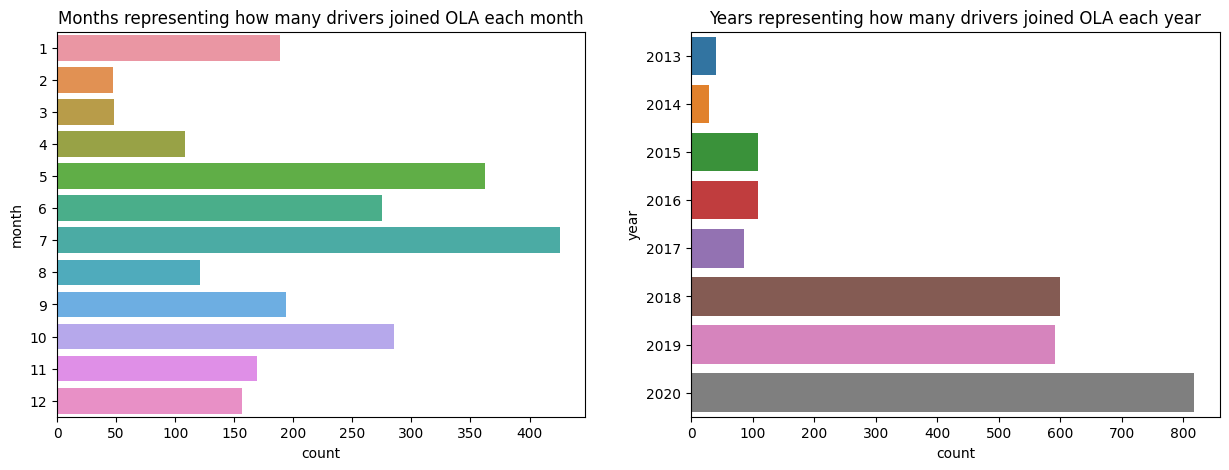

In [123]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1,2,1)
sns.countplot(y=ola1['month'])
plt.title('Months representing how many drivers joined OLA each month')

ax=fig.add_subplot(1,2,2)
sns.countplot(y='year',data=ola1)
plt.title('Years representing how many drivers joined OLA each year')

Observations:

# Maximum drivers have joined in the month of July
# The year , where maximum number of drivers joined is 2020
# After 2017, the number of drivers who joined Ola is more than 500
# Februry and March months recorded least number of drivers joining Ola
# The year 2014 and 2013 , these years recorded least number of drivers joining Ola

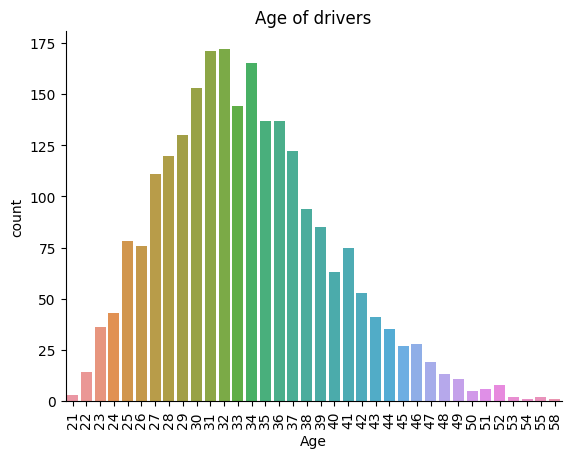

In [125]:
sns.countplot(x=ola1['Age'])
plt.title('Age of drivers')
plt.xticks(rotation=90)
sns.despine()

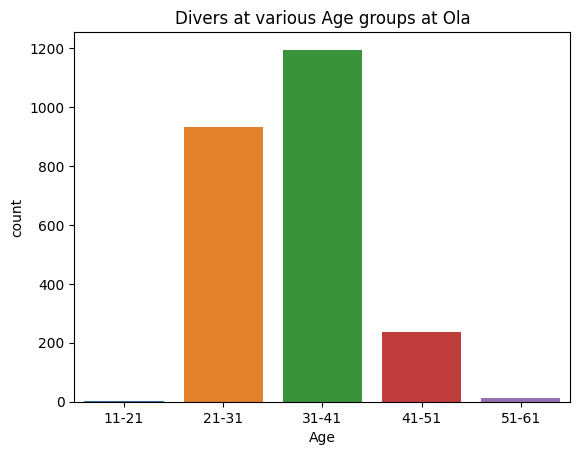

In [126]:
data_plot=pd.cut(ola1['Age'],bins=[11,21,31,41,51,61],labels=['11-21','21-31','31-41','41-51','51-61'])
sns.countplot(x=data_plot)
plt.title('Divers at various Age groups at Ola')
plt.show()

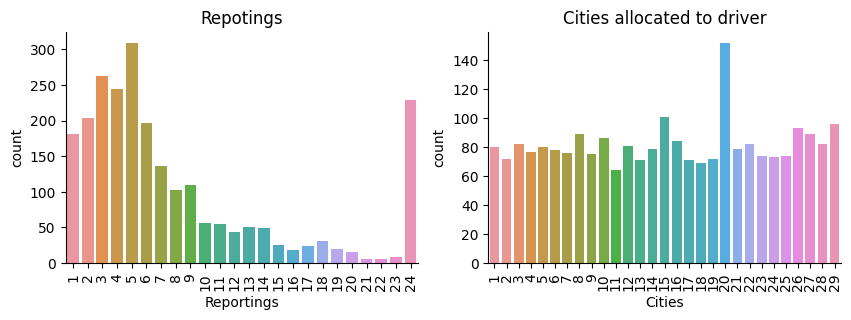

In [127]:
fig=plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,2,1)
sns.countplot(x=ola1['Reportings'])
plt.title('Repotings')
plt.xticks(rotation=90)
sns.despine()

ax=fig.add_subplot(1,2,2)
sns.countplot(x=ola1['Cities'])
plt.title('Cities allocated to driver')
plt.xticks(rotation=90)
sns.despine()




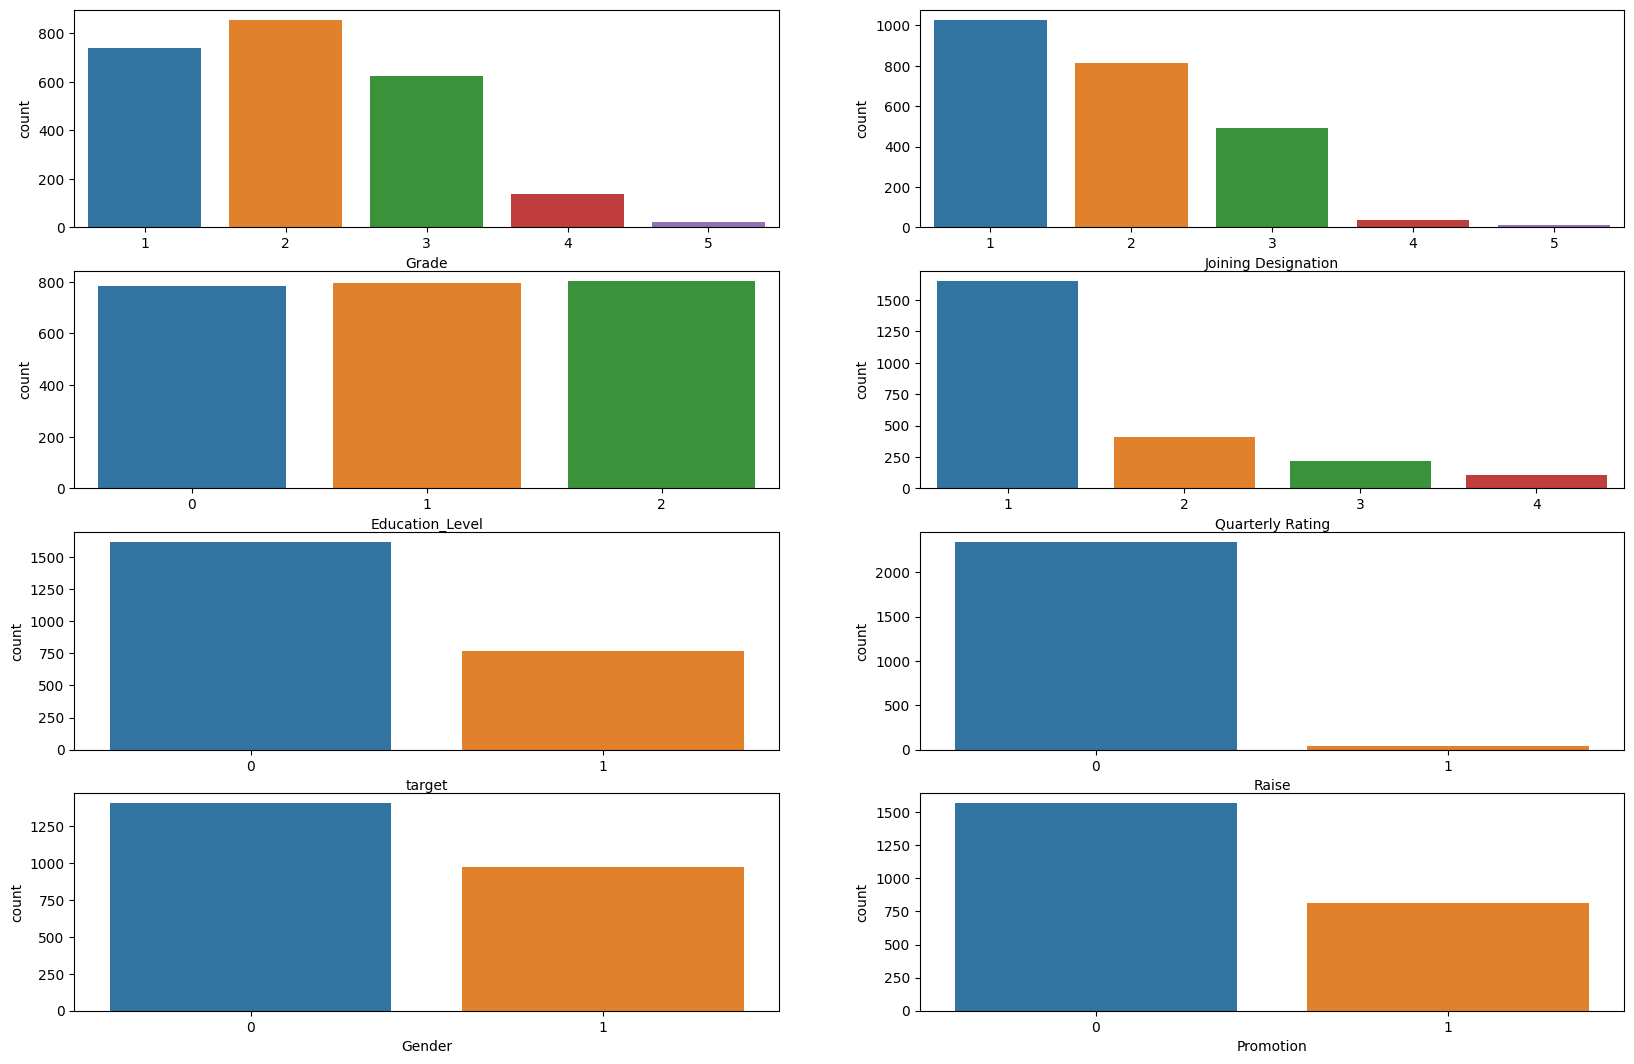

In [128]:
plt.figure(figsize=(20,13))
plt.subplot(4,2,1)
sns.countplot(x=ola1.Grade)

plt.subplot(4,2,2)
sns.countplot(x=ola1['Joining Designation'])

plt.subplot(4,2,3)
sns.countplot(x=ola1.Education_Level)

plt.subplot(4,2,4)
sns.countplot(x=ola1['Quarterly Rating'])

plt.subplot(4,2,5)
sns.countplot(x=ola1.target)

plt.subplot(4,2,6)
sns.countplot(x=ola1.Raise)

plt.subplot(4,2,7)
sns.countplot(x=ola1.Gender)

plt.subplot(4,2,8)
sns.countplot(x=ola1.Promotion)

plt.show()




In [129]:
# - Between 21 years(min age) to 58(max age) years of age, maximum number of drivers are 32 years o
# meanwhile the age group between 31-41 years of age receives the maximum number of drivers.
# -Majority of Drivers are male.
# - City C20 has been used by the most of the drivers.
# - There are 3 Education levels and all of them alomst have the equal distribution of Drivers.

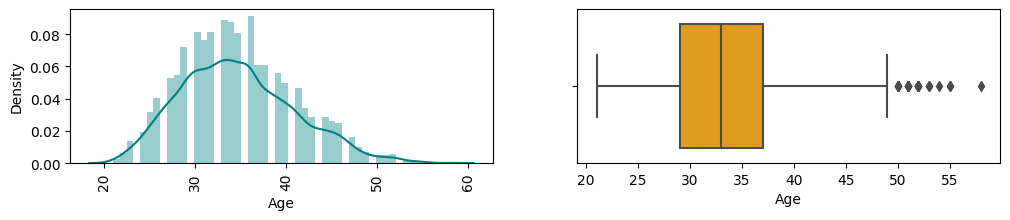

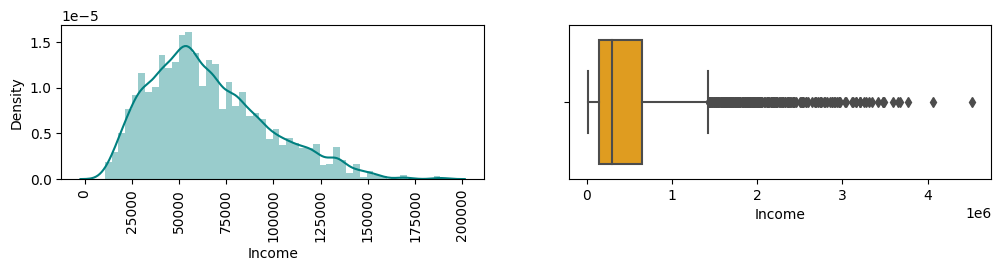

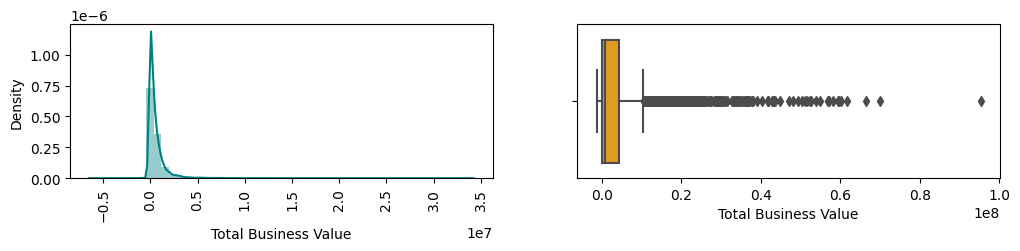

In [130]:
ola_sub_list=ola1[['Age', 'Income', 'Total Business Value' ]]
for feature in ola_sub_list:
    plt.figure(figsize=(12,2))
    plt.subplot(1,2,1)
    sns.distplot(ola[feature],color='teal')
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=ola1[feature],color='orange')
    plt.show()
        

Bivariate and multivariate

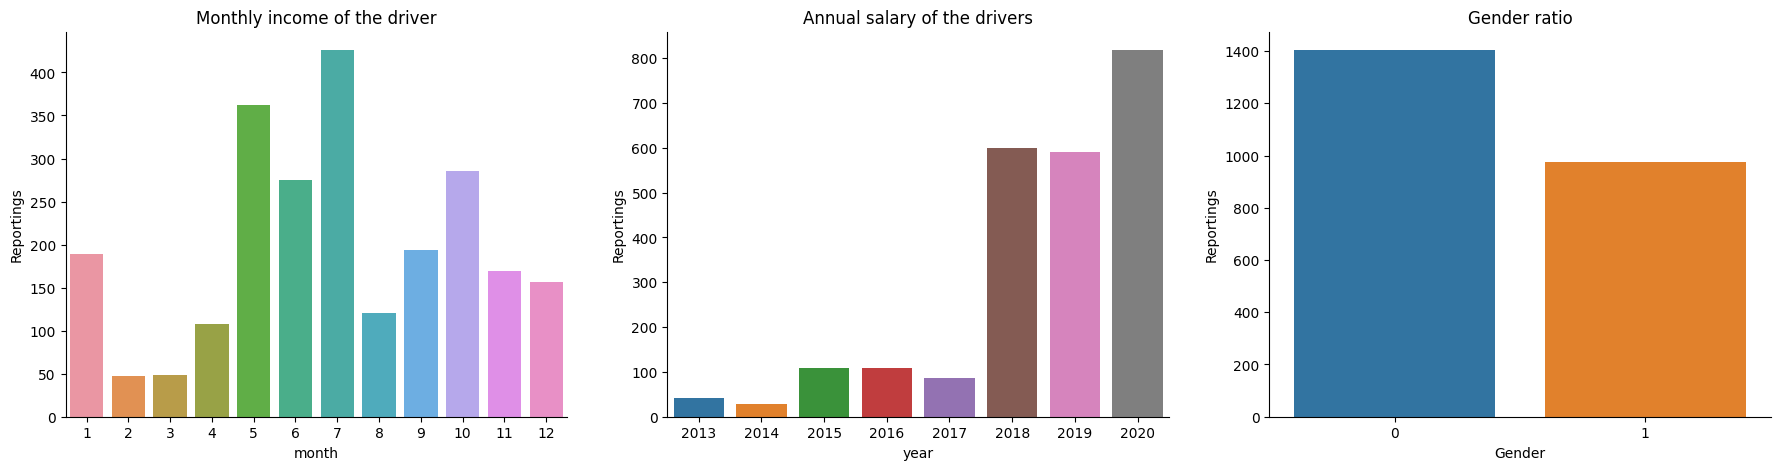

In [131]:
fig=plt.figure(figsize=(22,5))
ax=fig.add_subplot(1,3,1)
grouped_months=ola1.groupby(['month'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_months,x='month',y='Reportings')
plt.title('Monthly income of the driver')

ax=fig.add_subplot(1,3,2)
grouped_year=ola1.groupby(['year'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_year,x='year',y='Reportings')
plt.title('Annual salary of the drivers')

ax=fig.add_subplot(1,3,3)
grouped_gender=ola1.groupby(['Gender'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_gender,x='Gender',y='Reportings')
plt.title('Gender ratio')
sns.despine()
plt.show()

In [132]:
grouped_gender

,Gender,Reportings
0,0,1404
1,1,977


In [133]:
grouped_gender_percentile=(grouped_gender['Reportings']/sum(ola1['Reportings'])*100).round(2)
grouped_gender_percentile

0    7.35
1    5.11
Name: Reportings, dtype: float64

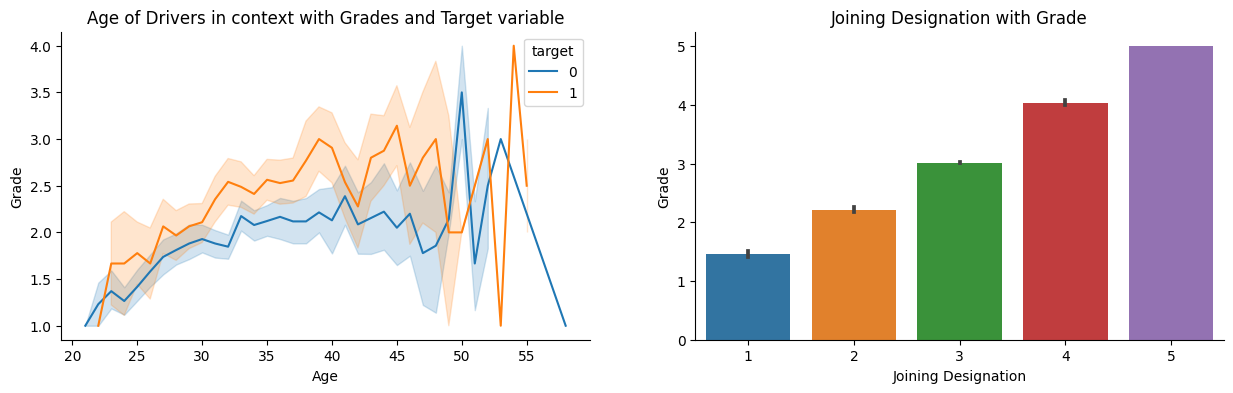

In [134]:
fig=plt.figure(figsize=(15,4))
ax=fig.add_subplot(1,2,1)
sns.lineplot(x=ola1['Age'],y=ola1['Grade'],hue=ola1['target'])
plt.title('Age of Drivers in context with Grades and Target variable')

ax=fig.add_subplot(1,2,2)
sns.barplot(data=ola1, x="Joining Designation", y="Grade")
plt.title('Joining Designation with Grade')
sns.despine()
plt.show()

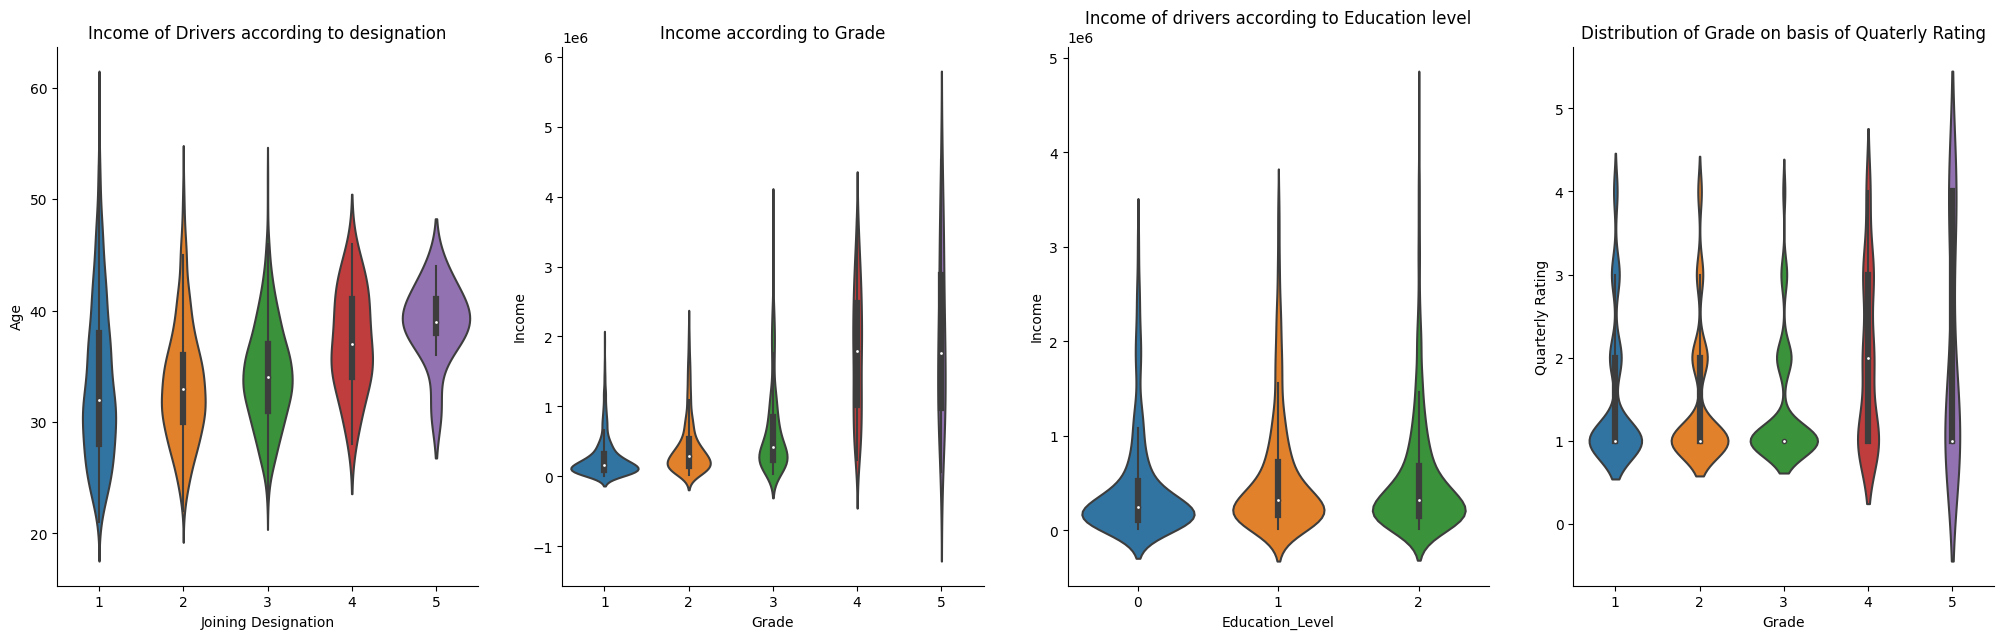

In [135]:
fig=plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
sns.violinplot(x=ola1['Joining Designation'],y=ola1['Age'])
plt.title('Income of Drivers according to designation')

plt.subplot(1,4,2)
sns.violinplot(x=ola1['Grade'],y=ola1['Income'])
plt.title('Income according to Grade')

plt.subplot(1,4,3)
sns.violinplot(x=ola1['Education_Level'],y=ola1['Income'])
plt.title('Income of drivers according to Education level')

plt.subplot(1,4,4)
sns.violinplot(x=ola1['Grade'],y=ola1['Quarterly Rating'])
plt.title('Distribution of Grade on basis of Quaterly Rating')

sns.despine()
plt.show()



Text(0.5, 1.0, 'Age vs Total Business Value')

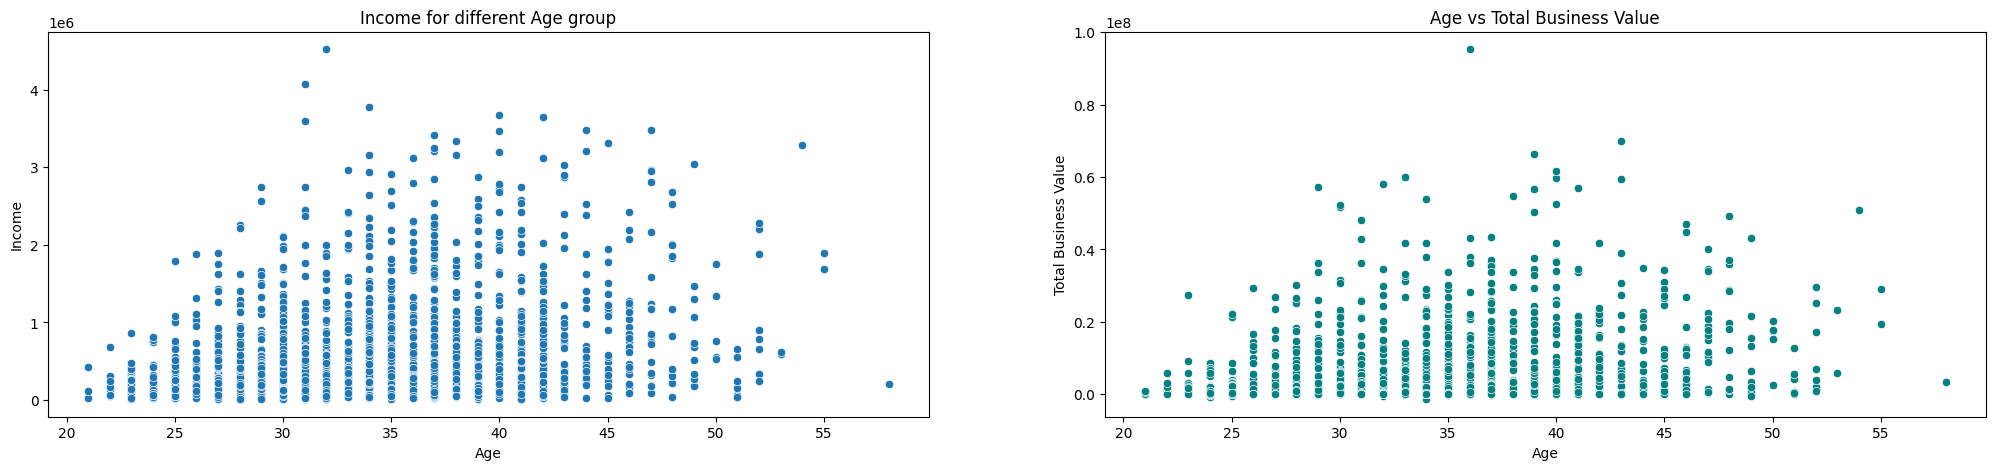

In [136]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(x=ola1['Age'],y=ola1['Income'])
plt.title('Income for different Age group')

plt.subplot(1,2,2)
sns.scatterplot(x=ola1['Age'],y=ola1['Total Business Value'],color='teal')
plt.title('Age vs Total Business Value')

In [137]:
ola.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


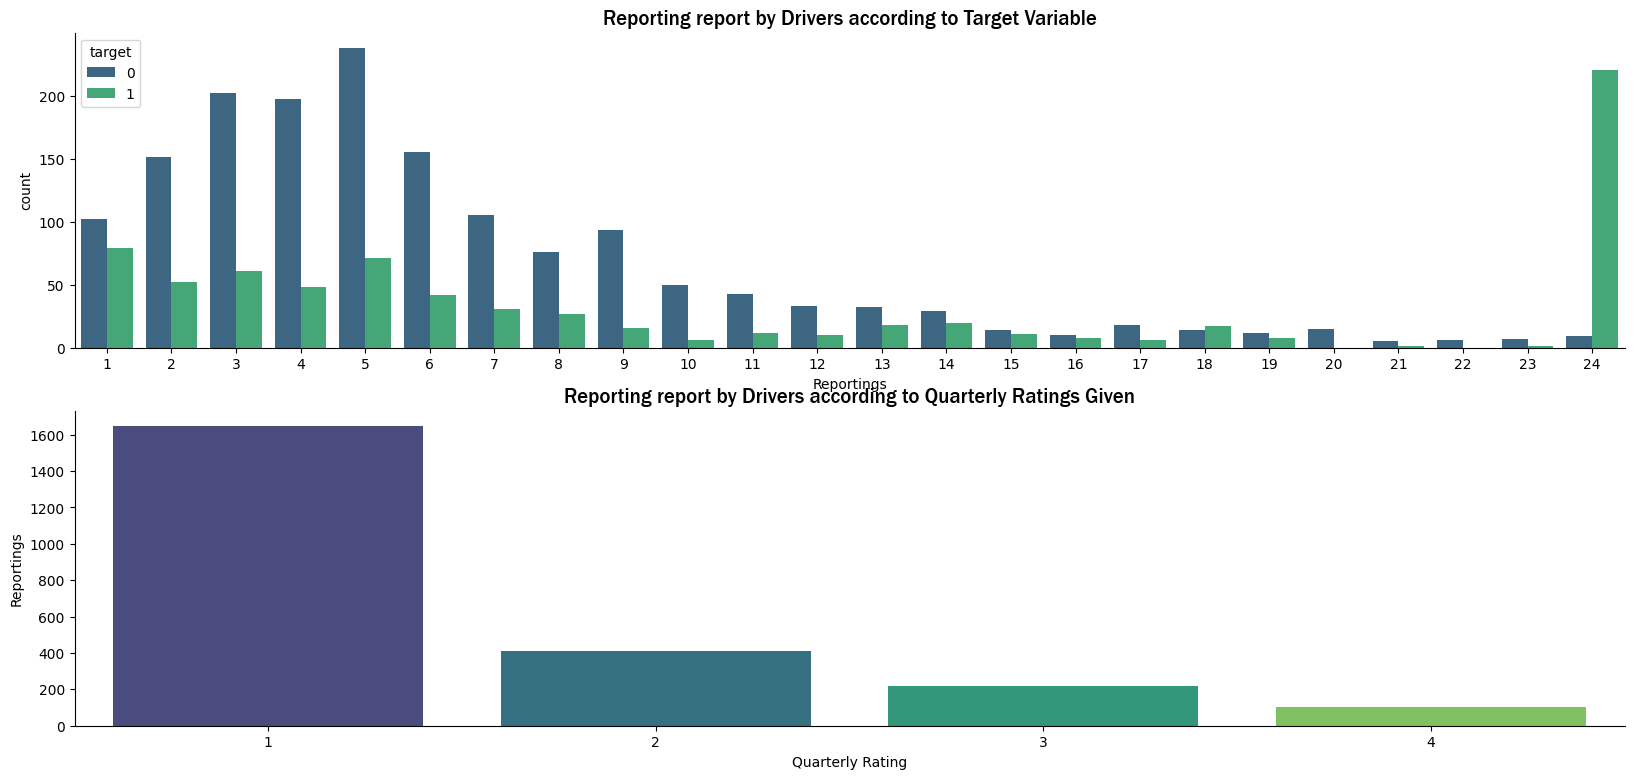

In [138]:
plt.figure(figsize=(20,9))
plt.subplot(2,1,1)
sns.countplot(x=ola1['Reportings'],hue=ola1.target,palette='viridis')
plt.title('Reporting report by Drivers according to Target Variable',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(2,1,2)
grouped_rating = ola1.groupby('Quarterly Rating')['Reportings'].count().reset_index()
sns.barplot(data = grouped_rating,y='Reportings',x='Quarterly Rating',palette='viridis')
plt.title('Reporting report by Drivers according to Quarterly Ratings Given',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()



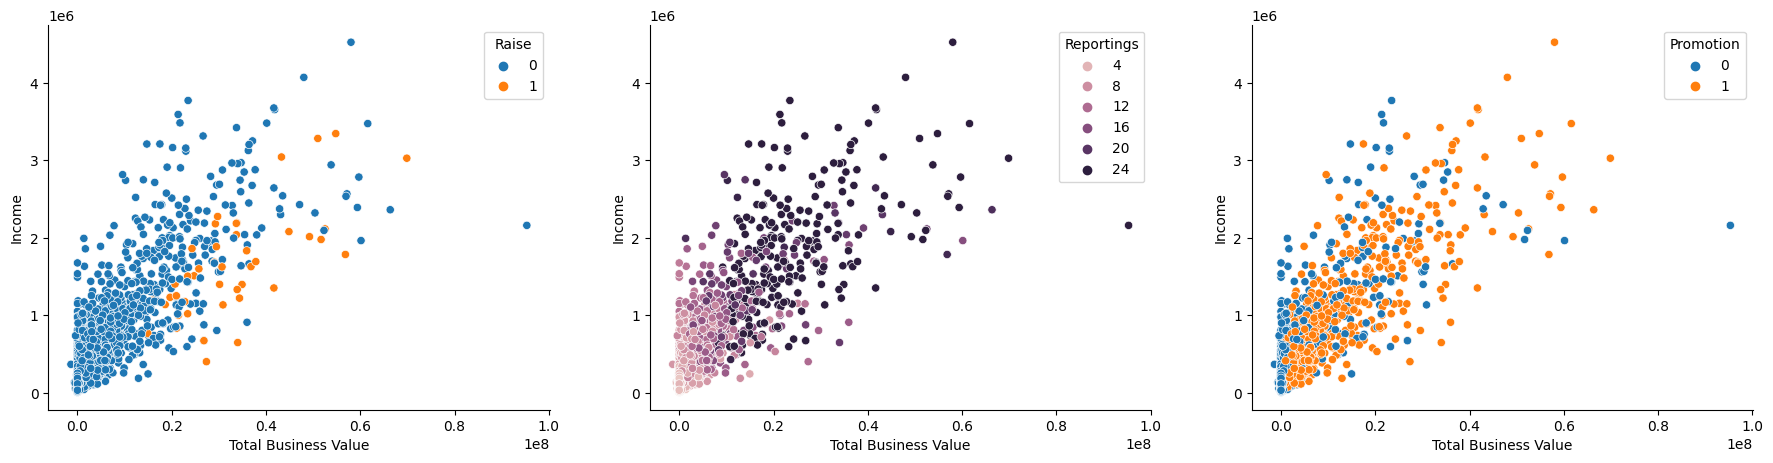

In [139]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=ola1['Total Business Value'],y=ola1.Income,hue=ola1.Raise)
plt.subplot(1,3,2)
sns.scatterplot(x=ola1['Total Business Value'],y=ola1.Income,hue=ola1.Reportings)
plt.subplot(1,3,3)
sns.scatterplot(x=ola1['Total Business Value'],y=ola1.Income,hue=ola1.Promotion)
sns.despine()
plt.show()


Observation

    # So we see that there are 57% male employees and 43% female employees.
    # The percentages of employees with different education levels are almost same for level 1 & 2.
    # 97.3% of the employees who did not get a raise.
    # Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
    # Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.
    # Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.
    # Number of employees has been increase with increase in year as well as number of reportings.
    # The majority of the employees seem to be associated with city C20.
    # Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
    # Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
    # Income decreses with increase in Destination as about 4% of the employees hold higher designations.
    # The median of the Income for employees having higher Grades is greater.
    # Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
    # Joining Designation Increases with increase in Grade.
    # Max reporting days is 24 days.
    # About 55% of the reportings of the employees has got Quarlerly Rating 1.
    # Number of reportings increases with increase in Income as well as Total Business Value.



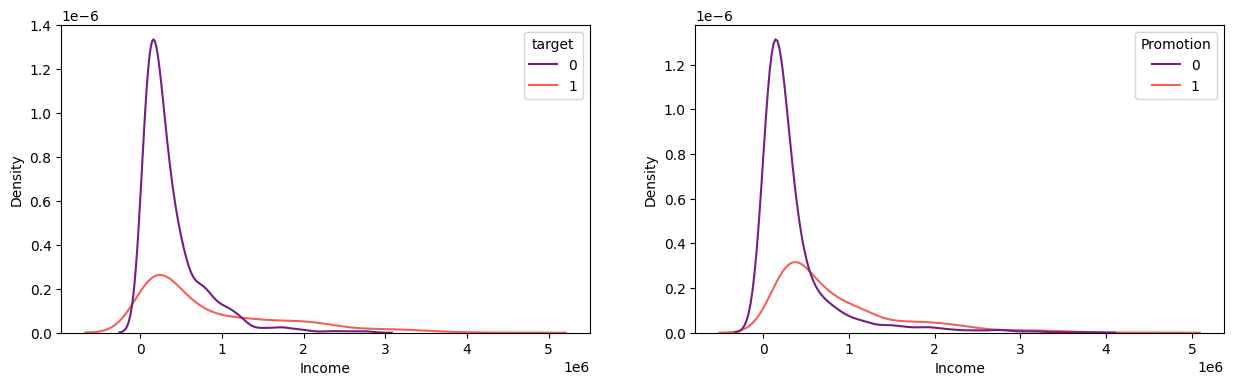

In [140]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(x=ola1.Income,hue=ola1['target'],palette='magma')
plt.subplot(1,2,2)
sns.kdeplot(x=ola1.Income,hue=ola1['Promotion'],palette='magma')
plt.show()

OUTLIER TREATMENT

In [141]:
ola1.describe()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion,Cities
count,2381.00000,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2.381000e+03,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,8.02352,1397.559009,33.663167,0.410332,1.00756,2.096598,4.586742e+06,5.267603e+05,1.820244,1.486350,6.975220,2018.536329,0.321294,0.018060,0.342713,15.335573
std,6.78359,806.161628,5.983375,0.491997,0.81629,0.941522,9.127115e+06,6.231633e+05,0.841433,0.834348,3.007801,1.609597,0.467071,0.133195,0.474716,8.371843
min,1.00000,1.000000,21.000000,0.000000,0.00000,1.000000,-1.385530e+06,1.088300e+04,1.000000,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,1.000000
25%,3.00000,695.000000,29.000000,0.000000,0.00000,1.000000,0.000000e+00,1.398950e+05,1.000000,1.000000,5.000000,2018.000000,0.000000,0.000000,0.000000,8.000000
50%,5.00000,1400.000000,33.000000,0.000000,1.00000,2.000000,8.176800e+05,2.929800e+05,2.000000,1.000000,7.000000,2019.000000,0.000000,0.000000,0.000000,15.000000
75%,10.00000,2100.000000,37.000000,1.000000,2.00000,3.000000,4.173650e+06,6.514560e+05,2.000000,2.000000,10.000000,2020.000000,1.000000,0.000000,1.000000,22.000000
max,24.00000,2788.000000,58.000000,1.000000,2.00000,5.000000,9.533106e+07,4.522032e+06,5.000000,4.000000,12.000000,2020.000000,1.000000,1.000000,1.000000,29.000000


In [142]:
ola1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


In [143]:
len(ola1[ola1['Total Business Value']<1])

729

Total Business Value column has some values in negative.
We consider them as outlier which will affect the results of the our machine learning model.

In [144]:
ola1=ola1[ola1['Total Business Value']>1]

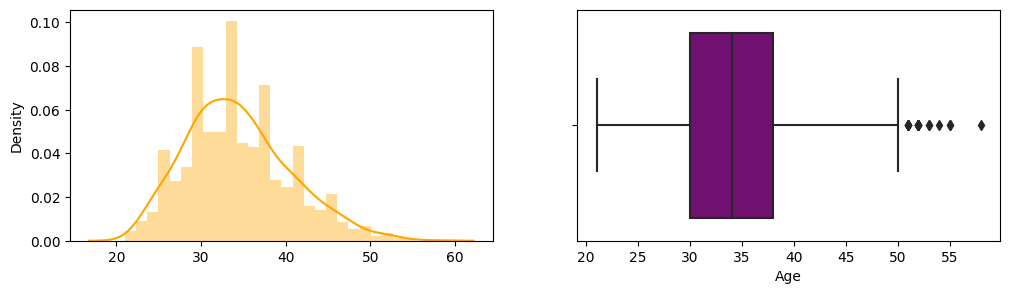

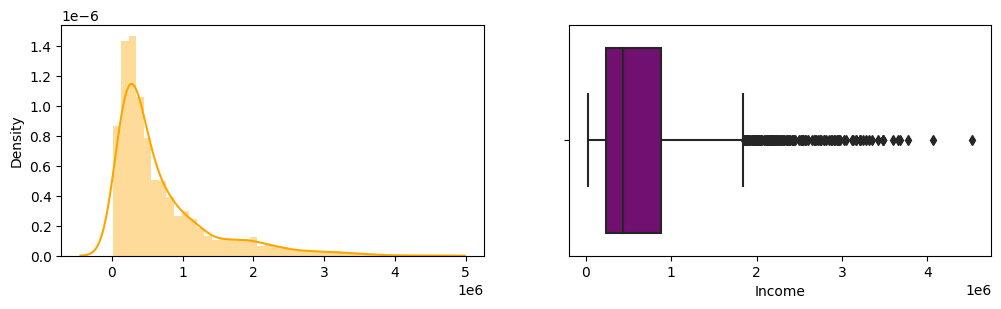

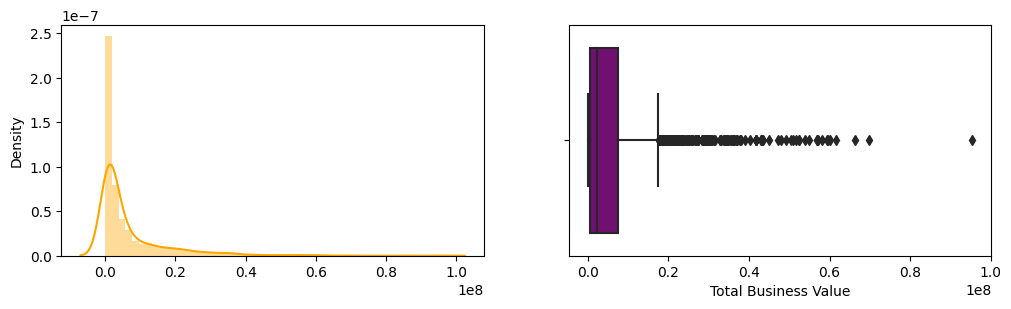

In [145]:
cols=ola1[['Age', 'Income', 'Total Business Value']]
for i in cols:
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.distplot(x=ola1[i],color='orange')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=ola1[i],color='purple')
   
    

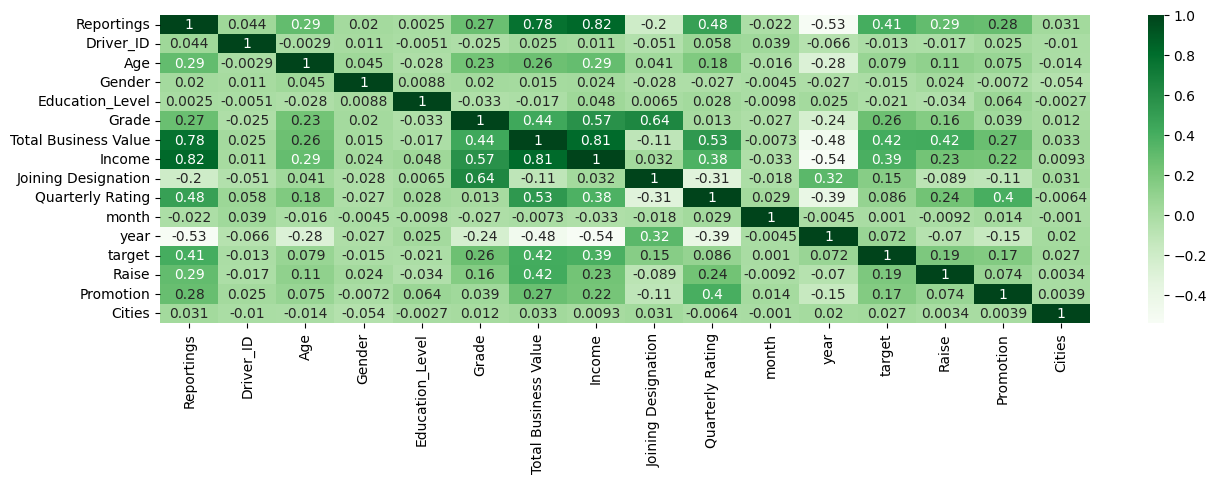

In [146]:
corr=ola1.corr()
plt.figure(figsize=(15,4))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

ENSEMBLE LEARNING

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [148]:
X=ola1.drop('target',axis=1)
y=ola1['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [149]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, Y, title):
    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,X,Y,return_times=True)
    fig, axes = plt.subplots(1, 1, figsize = (15, 5))
    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
#     32
    axes.grid()
    axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
    )
    axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
    )
    axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    plt.show()

In [150]:
X.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,23
2,5,4,43,0,2,2,350000,328015,2,1,11,2019,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,12,2020,0,1,11
7,6,12,35,0,2,1,2607180,168696,1,4,1,2019,0,1,23


In [151]:
ss=StandardScaler()
ss.fit_transform(X_train)

array([[ 0.65589398, -1.23197401,  1.04323138, ..., -0.16041207,
         1.00868826,  0.19858206],
       [-0.76026859, -1.05928345, -0.2409166 , ..., -0.16041207,
         1.00868826,  0.19858206],
       [ 1.93044029,  0.42144631,  1.36426837, ..., -0.16041207,
        -0.99138658, -0.86147323],
       ...,
       [ 1.93044029, -0.68205866,  1.20374987, ..., -0.16041207,
        -0.99138658,  0.08079814],
       [ 0.51427772,  0.23160916,  1.20374987, ..., -0.16041207,
         1.00868826, -0.27255362],
       [-1.0435011 , -0.85352447, -0.4014351 , ..., -0.16041207,
        -0.99138658,  0.90528559]])

In [152]:
from sklearn.model_selection import cross_validate

In [153]:
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.72 0.76 0.75 0.75 0.78]
Mean: 0.7542506637370685
Decision Tree: [0.855 0.867 0.852 0.852 0.845]
Mean: 0.8541078458299003
RandomForestClassifier(): [0.9  0.91 0.88 0.88 0.92]
Mean: 0.8958729286825964
GradientBoostingClassifier: [0.882 0.918 0.882 0.879 0.852]
Mean: 0.8825450883456927
XGBoostClassifier: [0.72 0.76 0.75 0.75 0.78]
Mean: 0.879520278311819


MACHINE LEARNING MODEL

In [154]:
# WITHOUT THE TREATMENT OF CLASS IMBALANCE
# Random Forest Classifier

In [157]:
rf_cf1=RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_cf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

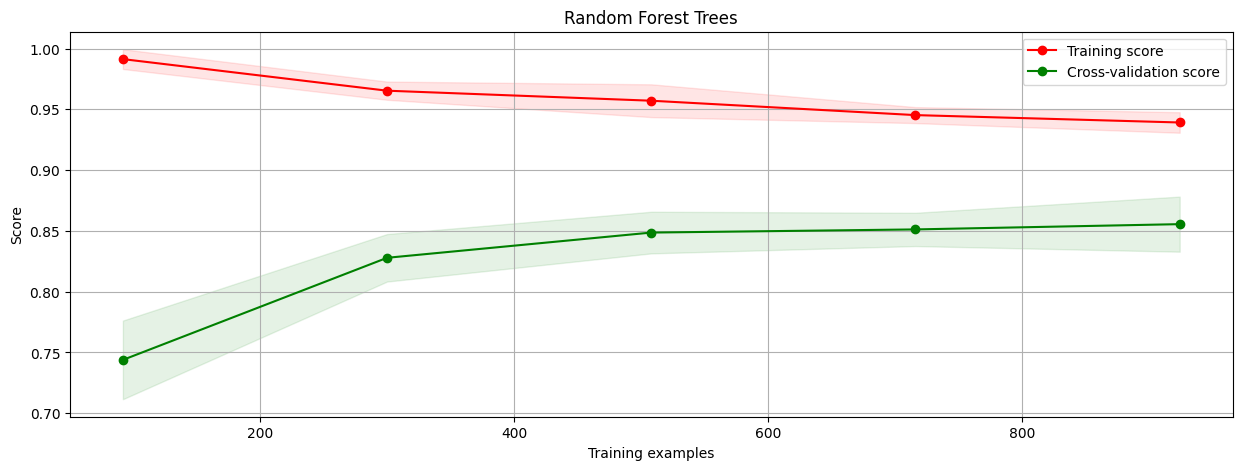

In [160]:
plot_learning_curve(rf_cf1, X_train, y_train, "Random Forest Trees")

In [166]:
y_pred=rf_cf1.predict(X_test)
proba=rf_cf1.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_cf1.score(X_train,y_train))
print("Test data accuracy:",rf_cf1.score(X_test,y_test))
print("Accuracy of the model:",accuracy_score(y_test,y_pred))
print("ROC-AUC score test dataset:",roc_auc_score(y_test,proba))
print(classification_report(y_test,y_pred))
cm1=(confusion_matrix(y_test,y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Train data accuracy: 0.9411764705882353
Test data accuracy: 0.8770161290322581
Accuracy of the model: 0.8770161290322581
ROC-AUC score test dataset: 0.9516246448863636
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       320
           1       0.84      0.81      0.82       176

    accuracy                           0.88       496
   macro avg       0.87      0.86      0.86       496
weighted avg       0.88      0.88      0.88       496

Confusion Matrix
[[292  28]
 [ 33 143]]


In [170]:
rf_clf_imp1 = rf_cf1.feature_importances_

XG Boosting Classifier

In [172]:
gbc1=GradientBoostingClassifier()
gbc1.fit(X_train,y_train)
y_pred=gbc1.predict(X_test)
proba=gbc1.predict_proba(X_test)[:,1]

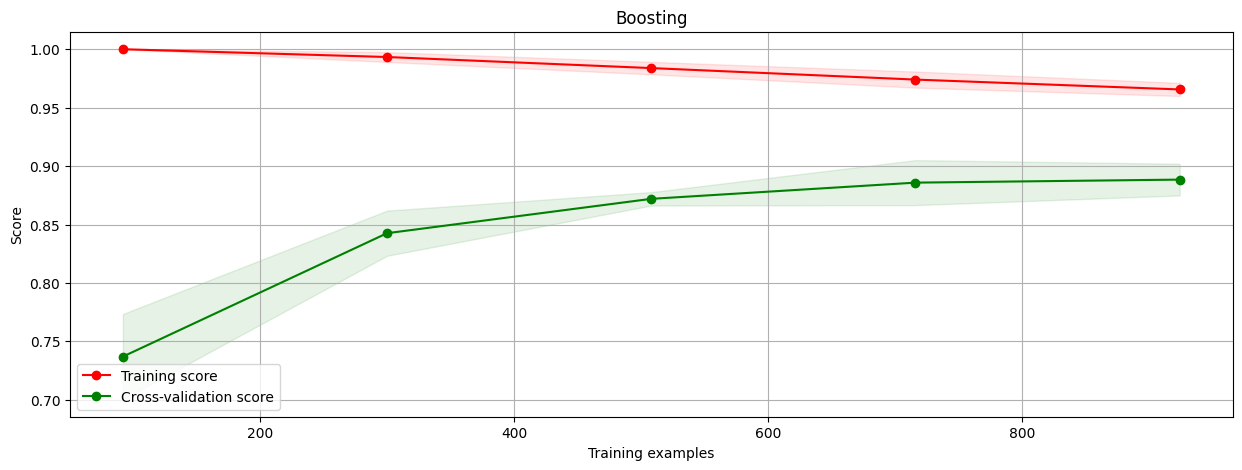

In [176]:
plot_learning_curve(gbc1,X_train,y_train, "Boosting")

In [177]:
gbc_clf_imp1=gbc1.feature_importances_

In [179]:
print("Train Score:",gbc1.score(X_train,y_train))
print("Test Score:", gbc1.score(X_test,y_test))
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Confusion Matrix")
cm2=(confusion_matrix(y_test,y_pred))
print(cm2)

Train Score: 0.9558823529411765
Test Score: 0.8971774193548387
Accuracy Score: 0.8971774193548387
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       320
           1       0.85      0.86      0.86       176

    accuracy                           0.90       496
   macro avg       0.89      0.89      0.89       496
weighted avg       0.90      0.90      0.90       496

Confusion Matrix
[[294  26]
 [ 25 151]]


CLASS IMBALANCE TREATMENT

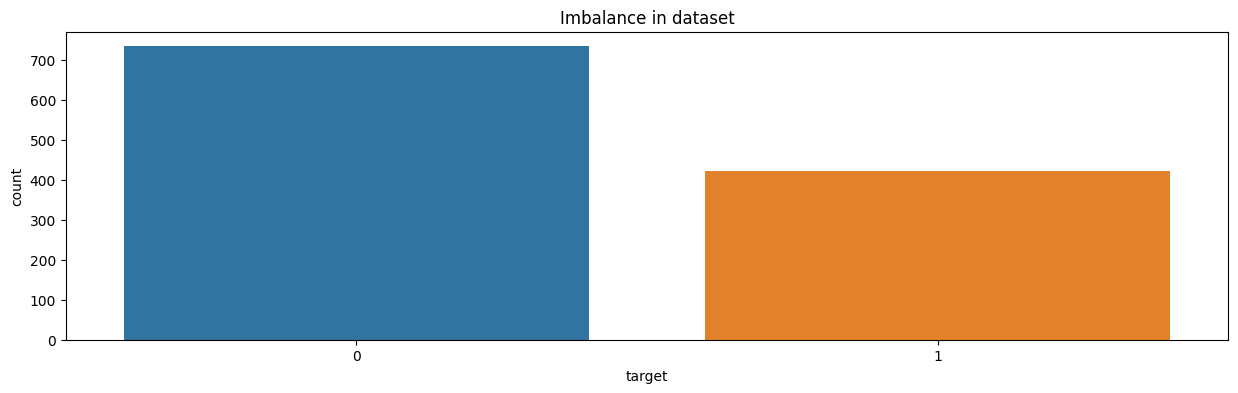

In [180]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train)
plt.title('Imbalance in dataset')
plt.show()

In [185]:
(y_train.value_counts()*100)/len(y_train)

target
0    63.49481
1    36.50519
Name: count, dtype: float64

In [186]:
from imblearn.over_sampling import SMOTE

In [190]:
smot=SMOTE(random_state=40)
X_train_smot,y_train_smot=smot.fit_resample(X_train,y_train.ravel())
X_train_smot.shape,y_train_smot.shape

((1468, 15), (1468,))

In [192]:
X_train_smot.shape, y_train_smot.shape

((1468, 15), (1468,))

In [194]:
X_test.shape, y_test.shape

((496, 15), (496,))

In [195]:
from collections import Counter
c=Counter(y_train_smot)
print(c)

Counter({1: 734, 0: 734})


Randome Forest Classifier

In [198]:
clf=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt', n_estimators=19)
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier(max_depth=8, n_estimators=19)

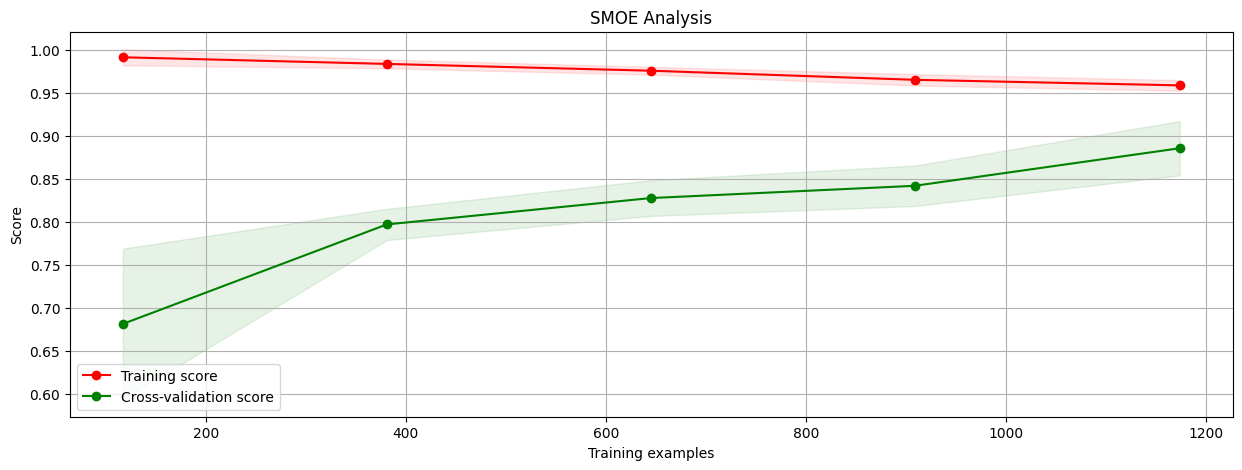

In [199]:
plot_learning_curve(clf,X_train_smot, y_train_smot,"SMOE Analysis")


In [202]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
print('Confusion Matrix')
cm3=confusion_matrix(y_test, y_pred)
print(cm3)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       320
           1       0.78      0.85      0.81       176

    accuracy                           0.86       496
   macro avg       0.84      0.86      0.85       496
weighted avg       0.86      0.86      0.86       496

Confusion Matrix
[[277  43]
 [ 27 149]]


In [204]:
rf_clf_imp2=clf.feature_importances_

Gradient Boosting

In [206]:
gcb2=GradientBoostingClassifier()
gcb2.fit(X_train_smot, y_train_smot)
y_pred1=gcb2.predict(X_test)
gbc_clf_imp2=gcb2.feature_importances_

print(classification_report(y_test, y_pred1))
cm4=confusion_matrix(y_test,y_pred1)
print(cm4)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       320
           1       0.79      0.90      0.84       176

    accuracy                           0.88       496
   macro avg       0.86      0.88      0.87       496
weighted avg       0.89      0.88      0.88       496

[[277  43]
 [ 17 159]]


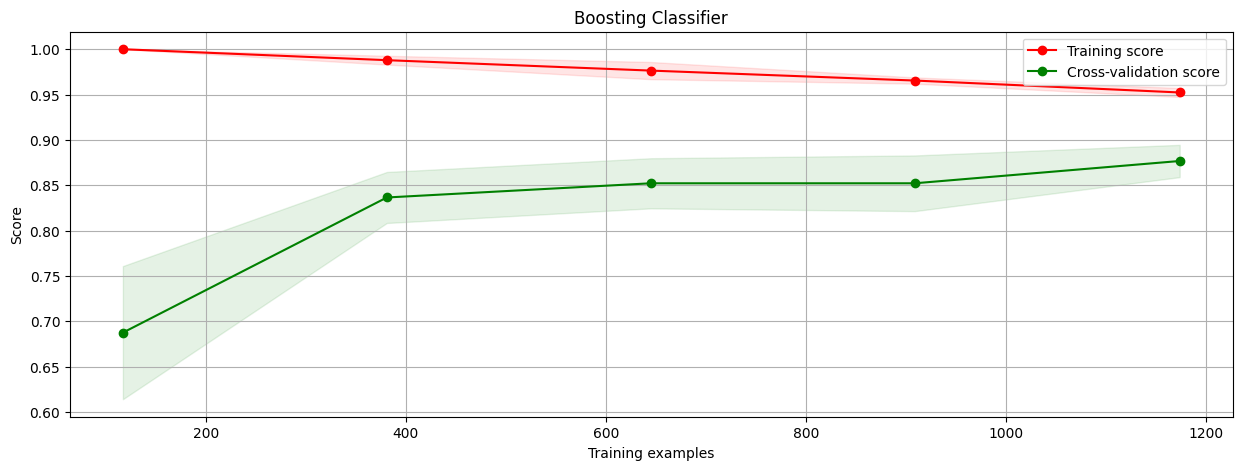

In [207]:
plot_learning_curve(gcb2,X_train_smot, y_train_smot, "Boosting Classifier")

In [212]:
data1=pd.DataFrame({'Column_Name':X.columns,
                   'RandomForestClassifier':rf_clf_imp1,
                  'XGBClassifier':rf_clf_imp1})

In [214]:
data2=pd.DataFrame({'Column_Name':X.columns,
                   'RandomForestClassifier': rf_clf_imp2,
                   'XGBClassifier':rf_clf_imp2})

In [215]:
data1

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.262745,0.262745
1,Driver_ID,0.032095,0.032095
2,Age,0.018344,0.018344
3,Gender,0.005232,0.005232
4,Education_Level,0.010119,0.010119
5,Grade,0.011033,0.011033
6,Total Business Value,0.123447,0.123447
7,Income,0.091327,0.091327
8,Joining Designation,0.055033,0.055033
9,Quarterly Rating,0.073030,0.073030


In [216]:
data2

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.154764,0.154764
1,Driver_ID,0.038006,0.038006
2,Age,0.046511,0.046511
3,Gender,0.009816,0.009816
4,Education_Level,0.018476,0.018476
5,Grade,0.030638,0.030638
6,Total Business Value,0.234600,0.234600
7,Income,0.130201,0.130201
8,Joining Designation,0.023392,0.023392
9,Quarterly Rating,0.042798,0.042798


<Axes: >

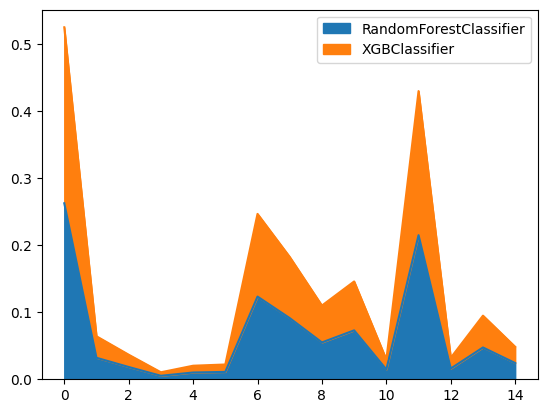

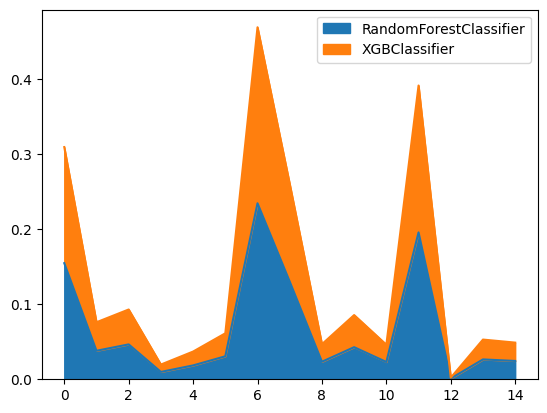

In [220]:

data1.plot(kind='area')

data2.plot(kind='area')

In [221]:
# calculating precision, reall and f1_score for every 
tp1,fp1,fn1,tn1 =cm1[0][0],cm1[0][1],cm1[1][0],cm1[1][1]
tp2,fp2,fn2,tn2 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp3,fp3,fn3,tn3 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp4,fp4,fn4,tn4 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 = (2*precision3*recall3)/(precision3+recall3)
f1_4 =(2*precision4*recall4)/(precision4+recall4)

In [222]:
df = pd.DataFrame({'Model':['RandomForest','GradientBoosting','RandomForest','GradientBoosting'],
                  'Class':['imbalanced','imbalanced','balanced','balanced'],
                  'True_pos':[tp1,tp2,tp3,tp4],
                  'Fal_pos':[fp1,fp2,fp3,fp4],
                  'Fal_neg':[fn1,fn2,fn3,fn4],
                  'True_neg':[tn1,tn2,tn3,tn4],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100,f1_4*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100,precision4*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100,recall4*100]})

In [223]:
df

,Model,Class,True_pos,Fal_pos,Fal_neg,True_neg,F1_score%,Precision%,Recall%
0,RandomForest,imbalanced,292,28,33,143,90.542636,91.2500,89.846154
1,GradientBoosting,imbalanced,294,26,25,151,92.018779,91.8750,92.163009
2,RandomForest,balanced,277,43,27,149,88.782051,86.5625,91.118421
3,GradientBoosting,balanced,277,43,17,159,90.228013,86.5625,94.217687


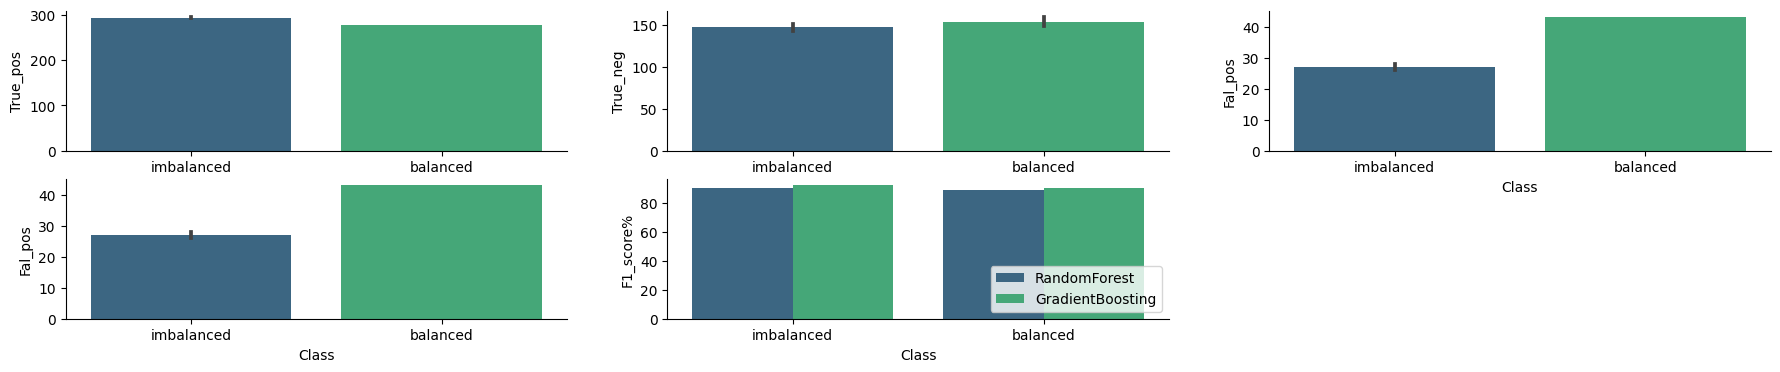

In [224]:
plt.figure(figsize=(22,4))
plt.subplot(2,3,1)
sns.barplot(x=df.Class,y=df.True_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,2)
sns.barplot(x=df.Class,y=df.True_neg,palette='viridis')
# plt.show()
plt.subplot(2,3,3)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,4)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
plt.subplot(2,3,5)
sns.barplot(x=df.Class,y=df['F1_score%'],palette='viridis',hue=df.Model)
plt.legend(loc='lower right')
sns.despine()
plt.show()

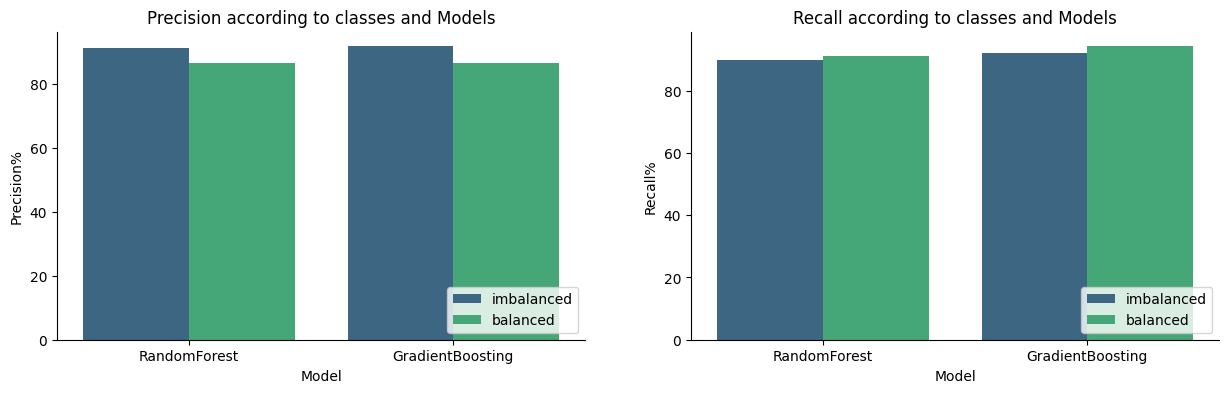

In [225]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x=df.Model,y=df['Precision%'],hue=df.Class,palette='viridis')
plt.title('Precision according to classes and Models')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
sns.barplot(x=df.Model,y=df['Recall%'],hue=df.Class,palette='viridis')
plt.title('Recall according to classes and Models')
plt.legend(loc='lower right')
sns.despine()
plt.show()

INSIGHTS


    # So we see that there are 57% male employees and 43% female employees.
    # The percentages of employees with different education levels are almost same for level 1 & 2.
    # 97.3% of the employees who did not get a raise.
    # Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
    # Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.
    # Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.
    # Number of employees has been increase with increase in year as well as number of reportings.
    # The majority of the employees seem to be associated with city C20.
    # Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
    # Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
    # Income decreses with increase in Destination as about 4% of the employees hold higher designations.
    # The median of the Income for employees having higher Grades is greater.
    # Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
    # Joining Designation Increases with increase in Grade.
    # Top reporting days is 24 days.
    # About 55% of the reportings of the employees has got Quarlerly Rating 1.
    # Number of reportings increases with increase in Income as well as Total Business Value.
    # Recall increased after treatment of data imbalance and is performing bettee in Gradient Boosting.
    # Precision dropped after treatment of data imbalance and is performing better in Random Forest.
    # F1_score incresed after the treatment of imabalanced data and in Gradient Boosting.
